<a href="https://colab.research.google.com/github/MatteoAldovardi92/Taxi_Project/blob/main/Preprocessing_Rescaling_and_DataloaderPreparation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
# To save a copy to be retrived from other notebooks
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [43]:
import pandas as pd
complete_df = pd.read_csv('/content/drive/MyDrive/datasets/combined_dataset1.csv')
complete_df.head()


,id,vendor_id,pickup_datetime,dropoff_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,dist_meters,wait_sec,city_id,mostly_rush_hour,means_velocity,geodetic_distance
0,1,México DF Taxi Libre,2016-09-18 06:16:33,2016-09-18 10:11:43,-99.297148,19.322128,-99.289949,19.326538,14110,1700,461,mexico,False,0.120482,900.407793
1,2,México DF Taxi Libre,2016-09-18 10:11:50,2016-09-18 10:23:11,-99.289603,19.326263,-99.271874,19.328530,681,2848,129,mexico,False,4.182085,1879.903684
2,3,México DF Taxi Libre,2016-09-18 10:23:38,2016-09-18 10:30:53,-99.271161,19.328875,-99.279900,19.326256,436,1409,106,mexico,False,3.231651,963.009858
3,4,México DF Taxi Libre,2016-09-18 10:44:18,2016-09-18 10:51:40,-99.282761,19.326944,-99.291705,19.322754,442,1567,85,mexico,False,3.545249,1048.168549
4,5,México DF Taxi Libre,2016-09-18 10:58:07,2016-09-18 10:59:46,-99.289712,19.322929,-99.289280,19.325978,100,797,19,mexico,False,7.970000,340.570623


In [44]:
import kagglehub
import os
import pandas as pd
import kagglehub



# Download latest version
path = kagglehub.dataset_download("mnavas/taxi-routes-for-mexico-city-and-quito")

print("Path to dataset files:", path)


# Show files inside the dataset directory
print("Dataset contents:")
for root, dirs, files in os.walk(path):
    for name in files:
        print(os.path.join(root, name))

# Download the dataset
path = kagglehub.dataset_download("mnavas/taxi-routes-for-mexico-city-and-quito")

# Load each CSV as a separate DataFrame
bog_df = pd.read_csv(os.path.join(path, "bog_clean.csv"))
uio_df = pd.read_csv(os.path.join(path, "uio_clean.csv"))
mex_df = pd.read_csv(os.path.join(path, "mex_clean.csv"))
all_df = pd.read_csv(os.path.join(path, "all-data_clean.csv"))

# Preview one
print(all_df.head())


Path to dataset files: /kaggle/input/taxi-routes-for-mexico-city-and-quito
Dataset contents:
/kaggle/input/taxi-routes-for-mexico-city-and-quito/mex_clean.csv
/kaggle/input/taxi-routes-for-mexico-city-and-quito/uio_clean.csv
/kaggle/input/taxi-routes-for-mexico-city-and-quito/all-data_clean.csv
/kaggle/input/taxi-routes-for-mexico-city-and-quito/bog_clean.csv
   id              vendor_id      pickup_datetime     dropoff_datetime  \
0   1                  Quito  2016-09-17 09:32:06  2016-09-17 10:05:51   
1   2  Guadalajara Easy Taxi  2016-09-17 09:59:54  2016-09-17 10:06:23   
2   3              Monterrey  2016-09-17 10:06:52  2016-09-17 10:09:40   
3   4              Monterrey  2016-09-17 09:45:56  2016-09-17 10:13:34   
4   5              Monterrey  2016-09-17 10:12:00  2016-09-17 10:16:31   

   pickup_longitude  pickup_latitude  dropoff_longitude  dropoff_latitude  \
0          0.632055         0.528947         -78.549447         -0.361363   
1          0.327804         0.391950   

In [45]:

complete_df.drop(['id', 'vendor_id', 'pickup_datetime',	'dropoff_datetime'], axis=1, inplace=True)
complete_df.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,dist_meters,wait_sec,city_id,mostly_rush_hour,means_velocity,geodetic_distance
0,-99.297148,19.322128,-99.289949,19.326538,14110,1700,461,mexico,False,0.120482,900.407793
1,-99.289603,19.326263,-99.271874,19.328530,681,2848,129,mexico,False,4.182085,1879.903684
2,-99.271161,19.328875,-99.279900,19.326256,436,1409,106,mexico,False,3.231651,963.009858
3,-99.282761,19.326944,-99.291705,19.322754,442,1567,85,mexico,False,3.545249,1048.168549
4,-99.289712,19.322929,-99.289280,19.325978,100,797,19,mexico,False,7.970000,340.570623


In [46]:
complete_df['pickup_latitude'].describe()

,pickup_latitude
count,42863.000000
mean,5.200849
std,8.494945
min,-0.516531
25%,-0.198359
50%,-0.150289
75%,19.271990
max,19.743222


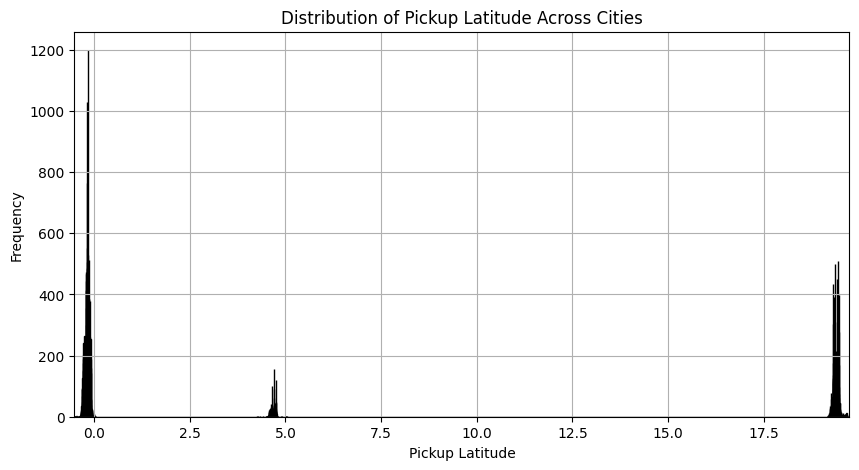

In [47]:
import matplotlib.pyplot as plt

# Plot histogram
plt.figure(figsize=(10, 5))
complete_df['pickup_latitude'].hist(bins=10000, color='skyblue', edgecolor='black')

# Set latitude range to cover all three cities
plt.xlim(min(complete_df['pickup_latitude']), max(complete_df['pickup_latitude']))  # Adjust as needed based on actual data range

# Labels and title
plt.xlabel('Pickup Latitude')
plt.ylabel('Frequency')
plt.title('Distribution of Pickup Latitude Across Cities')

plt.grid(True)
plt.show()

The distribution is trimodal and the latitudes between the cities have no meaning. Normalizing this feature would make me lose this information.
Since I am trying to predict the trip duration the only relevant information that can be extracted from the geographical coordinates are the geodetic distance and the categorical variable of the city you're in. Every city is different and can have a good or bad transportation system.
So we can drop the latitude and longitude columns.





In [48]:
complete_df.drop(['pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude'], axis=1, inplace=True)

In [49]:
complete_df

,trip_duration,dist_meters,wait_sec,city_id,mostly_rush_hour,means_velocity,geodetic_distance
0,14110,1700,461,mexico,False,0.120482,900.407793
1,681,2848,129,mexico,False,4.182085,1879.903684
2,436,1409,106,mexico,False,3.231651,963.009858
3,442,1567,85,mexico,False,3.545249,1048.168549
4,100,797,19,mexico,False,7.970000,340.570623
...,...,...,...,...,...,...,...
42858,823,5012,198,quito,True,6.089915,3904.363469
42859,4133,17581,1165,quito,True,4.253811,15859.529330
42860,2631,4872,2006,quito,False,1.851767,214.914383
42861,91,43,70,quito,False,0.472527,5.448470


In [50]:
complete_df.head()

,trip_duration,dist_meters,wait_sec,city_id,mostly_rush_hour,means_velocity,geodetic_distance
0,14110,1700,461,mexico,False,0.120482,900.407793
1,681,2848,129,mexico,False,4.182085,1879.903684
2,436,1409,106,mexico,False,3.231651,963.009858
3,442,1567,85,mexico,False,3.545249,1048.168549
4,100,797,19,mexico,False,7.970000,340.570623


In [51]:
from sklearn.model_selection import train_test_split

# First split: train (60%) and temp (40%)
train_df, temp_df = train_test_split(
    complete_df,
    test_size=0.4,
    random_state=42,
    stratify=complete_df['city_id']  # optional: keep city distribution balanced
)

# Second split: temp → validation (20%) and test (20%)
val_df, test_df = train_test_split(
    temp_df,
    test_size=0.5,
    random_state=42,
    stratify=temp_df['city_id']  # optional again
)


In [52]:
import pandas as pd

# One-hot encode 'city_id' and 'mostly_rush_hour'
train_df = pd.get_dummies(train_df, columns=['city_id', 'mostly_rush_hour'], drop_first=True)
val_df = pd.get_dummies(val_df, columns=['city_id', 'mostly_rush_hour'], drop_first=True)
test_df = pd.get_dummies(test_df, columns=['city_id', 'mostly_rush_hour'], drop_first=True)

y_train = train_df['trip_duration']
y_val = val_df['trip_duration']
y_test = test_df['trip_duration']

train_df.drop(['trip_duration'], axis=1, inplace=True)
val_df.drop(['trip_duration'], axis=1, inplace=True)
test_df.drop(['trip_duration'], axis=1, inplace=True)


In [54]:
from sklearn.preprocessing import StandardScaler

features_to_scale = ['dist_meters', 'wait_sec', 'geodetic_distance', 'means_velocity']

scaler = StandardScaler()
train_df[features_to_scale] = scaler.fit_transform(train_df[features_to_scale])
val_df[features_to_scale] = scaler.transform(val_df[features_to_scale])
test_df[features_to_scale] = scaler.transform(test_df[features_to_scale])


In [60]:
from sklearn.linear_model import LinearRegression

# Initialize the model
lr_model = LinearRegression()

# Fit to the training data
lr_model.fit(train_df, y_train)




LinearRegression()

In [62]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Predict on validation and test sets
y_val_pred = lr_model.predict(val_df)


# Compute metrics
val_rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))

r2_val = r2_score(y_val, y_val_pred)


print(f"Validation RMSE: {val_rmse:.2f}, R²: {r2_val:.2f}")



Validation RMSE: 1672.13, R²: 0.10


In [64]:
1672.13/3600

0.46448055555555556